In [1]:
import pandas as pd
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [4]:
year_months = list(uselog_months['연월'].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months['연월']==year_months[i]]
    tmp.rename(columns={'count':'count_0'}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months['연월']==year_months[i-1]]
    del tmp_before['연월']
    tmp_before.rename(columns={'count':'count_1'}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on='customer_id', how='left')
    uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog.head()

C:\Users\anmin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\anmin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\anmin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\anmin\anacond

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [9]:
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
for i in range(len(exit_customer)):
    exit_customer["exit_date"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1)
exit_customer["연월"] = pd.to_datetime(exit_customer["exit_date"]).dt.strftime("%Y%m")
uselog["연월"] = uselog["연월"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "연월"], how="left")
print(len(uselog))
exit_uselog.head()

<ipython-input-9-145fdfdc1018>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["exit_date"] = None
<ipython-input-9-145fdfdc1018>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
C:\Users\anmin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

33851


<ipython-input-9-145fdfdc1018>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["연월"] = pd.to_datetime(exit_customer["exit_date"]).dt.strftime("%Y%m")


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
exit_uselog = exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


In [11]:
conti_customer = customer.loc[customer['is_deleted']==0]
conti_uselog = pd.merge(uselog, conti_customer, on=['customer_id'], how='left')
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=['name'])
print(len(conti_uselog))

33851
27422


In [12]:
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset='customer_id')
print(len(conti_uselog))
conti_uselog.head()

2842


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201901,HI128243,4,3.0,XXXX,C01,M,2016-01-01,NaN,CA1,...,종일,10500.0,일반,3.916667,4.0,6.0,3.0,1.0,2019-04-30,39.0
1,201812,TS365803,6,8.0,XXXX,C01,F,2016-11-01,NaN,CA1,...,종일,10500.0,일반,5.833333,6.0,9.0,2.0,1.0,2019-04-30,29.0
2,201902,PL043724,10,12.0,XXX,C03,F,2019-01-08,NaN,CA1,...,야간,6000.0,일반,10.666667,10.0,12.0,10.0,1.0,2019-04-30,3.0
3,201901,OA794542,5,5.0,XXX,C02,M,2016-10-01,NaN,CA1,...,주간,7500.0,일반,5.083333,5.0,7.0,4.0,1.0,2019-04-30,30.0
4,201810,GD812922,6,6.0,XX,C01,M,2017-06-01,NaN,CA1,...,종일,10500.0,일반,5.333333,5.5,7.0,3.0,1.0,2019-04-30,22.0


In [13]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201901,HI128243,4,3.0,XXXX,C01,M,2016-01-01,NaN,CA1,...,10500.0,일반,3.916667,4.0,6.0,3.0,1.0,2019-04-30,39.0,NaN
1,201812,TS365803,6,8.0,XXXX,C01,F,2016-11-01,NaN,CA1,...,10500.0,일반,5.833333,6.0,9.0,2.0,1.0,2019-04-30,29.0,NaN
2,201902,PL043724,10,12.0,XXX,C03,F,2019-01-08,NaN,CA1,...,6000.0,일반,10.666667,10.0,12.0,10.0,1.0,2019-04-30,3.0,NaN
3,201901,OA794542,5,5.0,XXX,C02,M,2016-10-01,NaN,CA1,...,7500.0,일반,5.083333,5.0,7.0,4.0,1.0,2019-04-30,30.0,NaN
4,201810,GD812922,6,6.0,XX,C01,M,2017-06-01,NaN,CA1,...,10500.0,일반,5.333333,5.5,7.0,3.0,1.0,2019-04-30,22.0,NaN


In [14]:
# 테크닉 44: 예측할 달의 재적기간을 작성하자

predict_data['period'] = 0
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format='%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = int(delta.years*12 + delta.months)
predict_data.head()


<ipython-input-14-83eaad01450e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = int(delta.years*12 + delta.months)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201901,HI128243,4,3.0,XXXX,C01,M,2016-01-01,NaN,CA1,...,3.916667,4.0,6.0,3.0,1.0,2019-04-30,39.0,NaN,36,2019-01-01
1,201812,TS365803,6,8.0,XXXX,C01,F,2016-11-01,NaN,CA1,...,5.833333,6.0,9.0,2.0,1.0,2019-04-30,29.0,NaN,25,2018-12-01
2,201902,PL043724,10,12.0,XXX,C03,F,2019-01-08,NaN,CA1,...,10.666667,10.0,12.0,10.0,1.0,2019-04-30,3.0,NaN,0,2019-02-01
3,201901,OA794542,5,5.0,XXX,C02,M,2016-10-01,NaN,CA1,...,5.083333,5.0,7.0,4.0,1.0,2019-04-30,30.0,NaN,27,2019-01-01
4,201810,GD812922,6,6.0,XX,C01,M,2017-06-01,NaN,CA1,...,5.333333,5.5,7.0,3.0,1.0,2019-04-30,22.0,NaN,16,2018-10-01


In [15]:
# 테크닉 45: 결측치를 제거하자

predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1               256
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [17]:
predict_data = predict_data.dropna(subset=['count_1'])
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2638
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2638
period                  0
now_date                0
dtype: int64

In [22]:
# 테크닉 46 : 문자열 변수를 처리할 수 있도록 가공하자(OneHotEncoding)

target_col = ['campaign_name', 'class_name', 'gender', 'count_1', 'routine_flg', 'period', 'is_deleted']
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,일반,종일,M,3.0,1.0,36,0.0
1,일반,종일,F,8.0,1.0,25,0.0
2,일반,야간,F,12.0,1.0,0,0.0
3,일반,주간,M,5.0,1.0,27,0.0
4,일반,종일,M,6.0,1.0,16,0.0


In [23]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_일반,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_야간,class_name_종일,class_name_주간,gender_F,gender_M
0,3.0,1.0,36,0.0,1,0,0,0,1,0,0,1
1,8.0,1.0,25,0.0,1,0,0,0,1,0,1,0
2,12.0,1.0,0,0.0,1,0,0,1,0,0,1,0
3,5.0,1.0,27,0.0,1,0,0,0,0,1,0,1
4,6.0,1.0,16,0.0,1,0,0,0,1,0,0,1


In [24]:
del predict_data['campaign_name_일반']
del predict_data['class_name_야간']
del predict_data['gender_M']
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_종일,class_name_주간,gender_F
0,3.0,1.0,36,0.0,0,0,1,0,0
1,8.0,1.0,25,0.0,0,0,1,0,1
2,12.0,1.0,0,0.0,0,0,0,0,1
3,5.0,1.0,27,0.0,0,0,0,1,0
4,6.0,1.0,16,0.0,0,0,1,0,0


In [26]:
# 테크닉 47 : 의사결정나무를 사용해서 탈퇴예측모델을 작성하자

from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

exit = predict_data.loc[predict_data['is_deleted']==1]
conti = predict_data.loc[predict_data['is_deleted']==0].sample(len(exit))

X = pd.concat([exit, conti], ignore_index=True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

In [27]:
results_test = pd.DataFrame({'y_test':y_test, 'y_pred':y_test_pred})
results_test.head()

,y_test,y_pred
1392,0.0,0.0
819,1.0,1.0
544,1.0,1.0
1224,0.0,0.0
1999,0.0,0.0


In [28]:
# 테크닉 48 : 예측 모델을 평가하고, 모델을 튜닝해보자

correct = len(results_test.loc[results_test['y_test']==results_test['y_pred']])
data_count = len(results_test)
score_test = correct / data_count
print(score_test)

0.8897338403041825


In [29]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8897338403041825
0.976552598225602


In [31]:
X = pd.concat([exit, conti], ignore_index=True)
y = X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9277566539923955
0.9271229404309252


NameError: name 'plt' is not defined

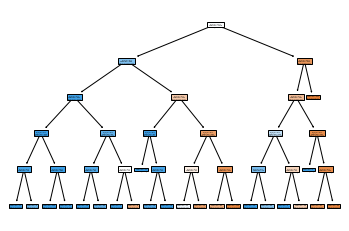

In [50]:
from sklearn import tree

tree.plot_tree(model, impurity = False, filled=True)
plt.show()

In [32]:
importance = pd.DataFrame({'feature_names': X.columns, 'coefficient':model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.363357
1,routine_flg,0.139860
2,period,0.496448
3,campaign_name_입회비무료,0.000000
4,campaign_name_입회비반액할인,0.000000
5,class_name_종일,0.000000
6,class_name_주간,0.000000
7,gender_F,0.000334


In [46]:
count_1 = 3
routing_flg = 1
period = 10
campaign_name = "입회비무료"
class_name = "종일"
gender = "M"

In [47]:
if campaign_name == "입회비반값할인":
    campaign_name_list = [1, 0]
elif campaign_name == "입회비무료":
    campaign_name_list = [0, 1]
elif campaign_name == "일반":
    campaign_name_list = [0, 0]
if class_name == "종일":
    class_name_list = [1, 0]
elif class_name == "주간":
    class_name_list = [0, 1]
elif class_name == "야간":
    class_name_list = [0, 0]
if gender == "F":
    gender_list = [1]
elif gender == "M":
    gender_list = [0]

In [48]:
input_data = [count_1, routing_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)

In [45]:
print(model.predict([input_data]))
print(model.predict_proba([input_data]))

[1.]
[[0. 1.]]
